# Shuffling

In [0]:
X = np.array([[1., 10., 100], [2., 20., 200], [3., 30.,300]])
y = np.array([[0,10,20], [1,11,21], [2,12,22]])
print( X.shape )
print( y.shape )
print( X  )
print( y )
from sklearn.utils import shuffle
X, y = shuffle(X.T, y.T)
print("After Shuffle")
print( X.T  )
print( y.T )


(3, 3)
(3, 3)
[[  1.  10. 100.]
 [  2.  20. 200.]
 [  3.  30. 300.]]
[[ 0 10 20]
 [ 1 11 21]
 [ 2 12 22]]
After Shuffle
[[100.   1.  10.]
 [200.   2.  20.]
 [300.   3.  30.]]
[[20  0 10]
 [21  1 11]
 [22  2 12]]


In [0]:
# Our Situation: N = 4
import random
X = np.array([[1., 10., 100, 1000], [2., 20., 200, 2000], [3., 30.,300, 3000]])
y = np.array([[0,10,20,30], [1,11,21,31], [2,12,22,32] ])
print( X.shape )
print( y.shape )

permutation = np.random.permutation( X.shape[1])
print( permutation)
X_s = X.T[permutation]
y_s = y.T[permutation]
print( X_s.T )
print( y_s.T )




(3, 4)
(3, 4)
[0 1 2 3]
[[1.e+00 1.e+01 1.e+02 1.e+03]
 [2.e+00 2.e+01 2.e+02 2.e+03]
 [3.e+00 3.e+01 3.e+02 3.e+03]]
[[ 0 10 20 30]
 [ 1 11 21 31]
 [ 2 12 22 32]]


# Adding Validation Loss

(10000, 784)
(784, 10000) (10, 10000)
X_train shape : (9999, 784)
y_train shape :(9999, 10)


Start training for following parameters :
 N  =  9999
 Shape of X     =  (784, 9999)
 Shape of y     =  (10, 9999)
 Batchsize      =  10
 Learning rate  =  0.1
 N for Val Data  = 1
Epoch 1: Train.-Loss   = 0.390591435074341
Epoch 1: Val-Loss      = 0.4135421806927194
Epoch 1: Finished
Epoch 2: Train.-Loss   = 0.01520608961330204
Epoch 2: Val-Loss      = 0.00028086919252460276
Epoch 2: Finished
Epoch 3: Train.-Loss   = 0.013398639129426616
Epoch 3: Val-Loss      = 0.00019222298318678356
Epoch 3: Finished
Epoch 4: Train.-Loss   = 0.01254664154398285
Epoch 4: Val-Loss      = 0.00022112392570528696
Epoch 4: Finished
Epoch 5: Train.-Loss   = 0.012426531426591295
Epoch 5: Val-Loss      = 0.0003010875984363078
Epoch 5: Finished
Epoch 6: Train.-Loss   = 0.012337877781054312
Epoch 6: Val-Loss      = 0.0003201055983463149
Epoch 6: Finished
Epoch 7: Train.-Loss   = 0.01232974627345157
Epoch 7: Val-Loss  

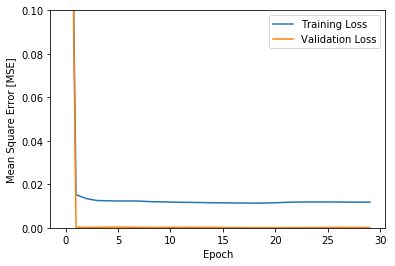

Testing-Loop :  1
1
1.0
9353
0.9353935393539354


In [0]:
import numpy as np 
import pandas as pd
from sklearn.utils import shuffle
import sys

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import metrics

def load_data( data_variant ):
  if (data_variant == "D2_N1_Y1"):
    X  = np.array([[1], [1]])
    y_true =np.array( [[22]] )

  elif (data_variant == "D2_N2_Y1"):
    X  = np.array( [[0.,1.], [0.,1.]] ) 
    y_true = np.array( [[0., 7.]] )

  elif (data_variant == "D2_N3_Y1"):
    X  = np.array( [[0.,1., 2.0], [0.1, 0.2, 0.3]] ) 
    y_true = np.array( [[10., -11., -15.0]] )

  elif (data_variant == "D2_N3_Y1_UNSCALED"):
    X  = np.array( [[0.,10., 200.0], [0.,1., 2.0]] ) 
    y_true = np.array( [[10., -11., -15.0]] )

  elif (data_variant == "D2_N100_Y1_UNSCALED"):
    X = np.arange(1,201).reshape(2,100) + 10*np.random.rand(2,100)
    y_true = np.arange(1,101).reshape(1,100) +500

  elif (data_variant == "MNIST"):
      X = np.loadtxt("sample_data/mnist_test.csv", delimiter=",")
      
      # first col contains labels; do one-hot-encoding
      y = X[:,:1]
      lr = np.arange(10)  # we have 10 labels
      y_true = (lr==y).astype(np.float)
      y_true[ y_true == 1] = 0.99
      y_true[ y_true == 0] = 0.01

      # remaining cols contain pixel values
      X = X[:,1:]
      print( X.shape  )
      return (X.T, y_true.T, )

  else: 
    raise Exception(f'Unkown datasource:  {data_variant}')

  return(X, y_true)

class standardizer:
  def __init__(self):
      self.row_scale_params = []
      
  def standardize(self, matrix):
    N = matrix.shape[0]
    result = np.empty( matrix.shape )    
    # run through the lines
    for i in range( N ):
      row = matrix[i,:]

      # Compute scaling parameters...
      mean = np.mean(row)
      std = np.std(row)

      # Handle std = 0 case
      if std < 1E-6:
        std = 1

      # and save
      self.row_scale_params.append( [mean, std] )
           
      # add the row to the output
      result[i, :] = np.array( (row - mean) / std  )

    return result

  def check(self, matrix):
    N = matrix.shape[0]
   
    for i in range( N ):
      row = matrix[i,:]

      # Compute scaling parameters...
      mean = np.mean(row)
      std = np.std(row)
      print(f"Row {i} : Mean = {mean}, Std = {std}")


def load_auto_mpg_data(samples = -1):
  df = pd.read_csv(
      "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
      na_values=['NA', '?'])


  print( df.describe() )

  # Handle the missing values
  df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

  nCyl = df['cylinders']
  nDis = df['displacement']
  nHor = df['horsepower']
  nWei = df['weight']
  nAcc = df['acceleration']
  nYea = df['year']
  nOri = df['origin']

  X = pd.concat( [nCyl, nDis, nHor, nWei, nAcc, nYea, nOri], axis = 'columns').values;
  y_true = np.array( [ df['mpg'].values ] ) # regression

  if (samples < 0 ):
    return (X.T, y_true)
  else:
    return ( X.T[:, 0:samples], y_true[:, 0:samples])

def activation(z, act_func):
    global _activation
    if act_func == 'relu':
        h = np.maximum(z , np.zeros(z.shape))
        if not np.array_equal(h,z):
          _activation = _activation + 1;
          
        return np.maximum(z, np.zeros(input_.shape))
    
    elif act_func == 'sigmoid':
      return 1.0/(1.0 + np.exp( -z ))

    elif act_func == 'linear':
        return z
    else:
        raise Exception('Activation function is not defined.')

def loss(y_true, y_predicted, loss_function='mse'):
   if loss_function == 'mse':
      return metrics.mean_squared_error( y_true, y_predicted)
   else:
      raise Exception('Loss metric is not defined.')


def get_dZ_from_loss(y, y_predicted, metric):
    if metric == 'mse':
        return (y_predicted - y)

    else:
        raise Exception('Loss metric is not defined.')
   
def get_dactivation(A, act_func):
    if act_func == 'relu':
        return np.maximum(np.sign(A), np.zeros(A.shape)) # 1 if backward input >0, 0 otherwise; then diaganolize

    elif act_func == 'sigmoid':
        h = activation(A, 'sigmoid')
        return h *(1-h)

    elif act_func == 'linear':
        return np.ones(A.shape)

    else:
        raise Exception('Activation function is not defined.')
        
class layer:
  def __init__(self,input_dim, output_dim, activation='relu'):    
    self.activation = activation
    self.input_dim = input_dim
    self.output_dim = output_dim # is this needed?? TODO
    if input_dim > 0:
      self.b = np.ones( (output_dim,1) )       
      self.W = np.random.randn( output_dim, input_dim )
      self.W = np.random.randn(output_dim, input_dim) * np.sqrt(2/input_dim) 
    
    self.A = np.zeros( (output_dim,1) ) # added: we temp. store for A
  
  def setWeight(self, W ):
    self.W = W
    
  def setBias(self, b ):
    self.b = b
    
  def setActivation(self, A ): 
    self.Z =  np.add( np.dot(self.W, A), self.b)
    self.A =  activation(self.Z, self.activation)
  
  
  def print(self, layer_name=""):
    print(f"Layer {layer_name}: Begin of Summary")
    if self.input_dim > 0:
      print(f"Layer {layer_name}: input_dim = {self.input_dim}")
      print(f"Layer {layer_name}: output_dim = {self.output_dim}")
      print(f"Layer {layer_name}: Activation = {self.activation}")
      print(f"W = ")
      print(self.W)
      print(f"A = ")
      print(self.A)
      print(f"b = ")
      print(self.b)
    else:
      print(f"Layer {layer_name}: This is an input layer..... ")
      print(f"A = ")
      print(self.A)
  
    print(f"Layer {layer_name}: End of Summary")
  

class ModelNet:
  def __init__(self, input_dim):  
    self.history = []
    self.neural_net = []
    self.neural_net.append(layer(0 , input_dim, 'irrelevant'))
    

  def addLayer(self, nr_neurons, activation='relu'):    
    layer_index = len(self.neural_net)
    input_dim = self.neural_net[layer_index - 1].output_dim
    new_layer = layer( input_dim, nr_neurons, activation)
    self.neural_net.append( new_layer )
    
  
  def get_history(self):
     return pd.DataFrame(
         self.history, 
         columns=['epoch', 'train_loss', 'val_loss']
     )         

  def forward_propagation(self, input_vec ):
    self.neural_net[0].A = input_vec
    for layer_index in range(1,len(self.neural_net)):    
      _A_Prev = self.neural_net[layer_index-1].A                       
      self.neural_net[layer_index].setActivation( _A_Prev )
      
    return  self.neural_net[layer_index].A
    
    
  def fit(self, training_data, epochs, val_data = None, early_stop=1, doShuffle=True, batch_size=0, learning_rate=0.01, verbose=1 ):
    self.learning_rate = learning_rate
    self.history = []  # Reset History Array
    
    X_train, y_train = training_data

    if val_data:
      X_valid, y_valid = val_data

    num_train_datum = X_train.shape[1]

    print(f"\n\nStart training for following parameters :")
    print(f" N  =  {num_train_datum}")
    print(f" Shape of X     =  {X_train.shape}")
    print(f" Shape of y     =  {y_train.shape}")
    print(f" Batchsize      =  {batch_size}")
    print(f" Learning rate  =  {learning_rate}")
    if val_data:
      print(f" N for Val Data  = {X_valid.shape[1]}")
    else:
      printf(" No validation data provided")  
    
    # Training Loop
    for epoch in range(1,epochs+1): 
      # Shuffle the training data
       
      # Step 1: Do forward propagation and calculate losses ----------------
      # ... for validation data
      if val_data:
        y_valid_predicted = self.forward_propagation( X_valid )
        validation_loss = loss(y_valid, y_valid_predicted)
      else:
        validation_loss = -1

      
      # .. for training data
      y_train_predicted = self.forward_propagation( X_train )
      training_loss   = loss(y_train, y_train_predicted)
      
      # ... and update history
      self.history.append([epoch, training_loss, validation_loss])

      # Step 2: Check for early stopping ----------------------------------
       # added: early stopping
      if (epoch > 7)  and (early_stop == 1):
        actual_train_loss = self.history[epoch-1][1] # epochs start with one!
        actual_val_loss   = self.history[epoch-1][2] # epochs start with one!
        past_loss   = self.history[epoch-6][1] 
        if (abs(actual_train_loss - past_loss)) < 1E-3:
          print(f"Early stop in after epoch {epoch} with training-loss  {actual_train_loss}")
          print(f"Early stop in after epoch {epoch} with validation-loss  {actual_val_loss}")          
          print(f"   Prev Loss ({epoch-5}) : {past_loss} [Delta: { abs(actual_train_loss-past_loss) }]")

          break   
      
      # Print before update
      if (verbose > 0):
        print(f"Epoch {epoch}: Train.-Loss   = { training_loss  }")
        print(f"Epoch {epoch}: Val-Loss      = { validation_loss  }")
        print(f"Epoch {epoch}: Finished")

      # Step 2: Learning Step
      # Start to prepare the batches ...
      if batch_size:
        # Shuffle, IMPROVE, as this creats a copy..
        if doShuffle:
          X_shuffle, y_shuffle = shuffle(X_train.T, y_train.T)
        else:
          X_shuffle, y_shuffle = (X_train.T, y_train.T)
          
        # Note the transpose, to undo shuffel transpose
        X_train_batches_list = [   
            X_shuffle.T[: , k:k+batch_size]
            for k in range(0, num_train_datum, batch_size)]  

        y_train_batches_list = [   
            y_shuffle.T[:, k:k+batch_size]
            for k in range(0, num_train_datum, batch_size)]  

        nr_batches = len(X_train_batches_list)      
        for i in range( nr_batches ):
            X_train_batch = X_train_batches_list[i]
            y_train_batch = y_train_batches_list[i]

            y_train_batch_predicted = model.forward_propagation( X_train_batch )
            self.backward_propagation( y_train_batch, y_train_batch_predicted, 1, verbose = verbose - 1 )

            # Update the weights an biases
            self.update( learning_rate )

      # Training with full data set
      else:
          y_train_predicted = model.forward_propagation( X_train )
          self.backward_propagation( y_train, y_train_predicted, 1, verbose = verbose - 1 )

          # Update the weights an biases
          self.update( learning_rate )

    print(f"\nEpoch {epoch}: Training   Loss = {training_loss}")    
    print(f"Epoch {epoch}: Validation Loss = {validation_loss}")    
      
  def backward_propagation(self, y, y_predicted, num_train_datum, metric='mse', verbose=0):   
    nr_layers = len(self.neural_net)
    for layer_index in range(nr_layers-1,0,-1):
        if layer_index+1 == nr_layers: # if output layer

            # This is  outpu layer with activation!
            dZ = np.multiply(get_dZ_from_loss(y, y_predicted, metric), 
                             get_dactivation(
                                self.neural_net[layer_index].A, 
                                self.neural_net[layer_index].activation)
            )
#           dZ = get_dZ_from_loss(y, y_predicted, metric)
        else: 
            dZ = np.multiply(
                   np.dot(
                       self.neural_net[layer_index+1].W.T, 
                       dZ), 
                   get_dactivation(
                         self.neural_net[layer_index].A, 
                         self.neural_net[layer_index].activation)
                   )
           
        
        dW = np.dot(dZ, self.neural_net[layer_index-1].A.T) / num_train_datum
        db = np.sum(dZ, axis=1, keepdims=True) / num_train_datum
        
        self.neural_net[layer_index].dW = dW
        self.neural_net[layer_index].db = db
        if (verbose > 0):
          print(f"\n\n====== Backward Propagation Layer {layer_index} =======")
          print(f"dZ      =  {dZ}")          
          print(f"dW      =  {dW}")
          print(f"db     =  {db}")
          print(f"A           = {self.neural_net[layer_index].A}") 
          print(f"A prev lay  = {self.neural_net[layer_index-1].A}") 
             
  # added
  def update( self, learning_rate ):
    nr_layers = len(self.neural_net)
    for layer_index in range(1,nr_layers):        # update (W,b)
      self.neural_net[layer_index].W = self.neural_net[layer_index].W - learning_rate * self.neural_net[layer_index].dW  
      self.neural_net[layer_index].b = self.neural_net[layer_index].b - learning_rate * self.neural_net[layer_index].db

  def summary(self):
      print("MODEL SUMMARY")
      for layer_index in range(len(self.neural_net)):        
        self.neural_net[layer_index].print(layer_index)
        
      print("FINISHED MODEL SUMMARY")
      
        
#Testing---------------------------------   
_activation = 0     
input_dim = 784
output_dim = 10
model = ModelNet( input_dim )
model.addLayer( 60, 'sigmoid' )
#model.addLayer( 4, 'relu' )
model.addLayer( output_dim, 'sigmoid' )

(X, y_true ) = load_data("MNIST")

print( X.shape, y_true.shape)



#Scaling
standardizer = standardizer()
X_S = standardizer.standardize( X )

X_train, X_test, y_train, y_test = train_test_split(    
    X_S.T, y_true.T, test_size=1, random_state=42)

print(f"X_train shape : {X_train.shape}")
print(f"y_train shape :{y_train.shape}")



model.fit( (X_train.T, y_train.T) , 
          30, 
          (X_test.T, y_test.T), 
          early_stop = 0, 
          learning_rate = 0.1,
          batch_size = 10,
          doShuffle = False,
          verbose=1)
history = model.get_history()
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')


# We do the plot by ourselves
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [MSE]')
plt.ylim([0,0.1])  
plt.legend()
plt.show()

# Test for a single image
print (f"Testing-Loop :  {X_test.shape[0]}")

count = 0
test_cases = X_test.shape[0]
#test_cases = 2
for test_id in range(test_cases):
  input_vec = np.array( [ X_test.T[:, test_id ] ] ).T
  y_predicted = model.forward_propagation( input_vec )
  nr_pred = y_predicted.argmax()
  nr_real = y_test[test_id].argmax() 
  if (nr_real == nr_pred ):
    count = count + 1

  if (test_id < 0):
    print("\ny_predicted")
    print( y_predicted.argmax() )
    print( y_predicted)
    
    print("y_true")
    print( y_test[test_id].argmax() )
    print( y_test[test_id])


print( count )
print( count / test_cases )


# Same loop for training data
count = 0
test_cases = X_train.shape[0]
#test_cases = 2
for test_id in range(test_cases):
  input_vec = np.array( [ X_train.T[:, test_id ] ] ).T
  y_predicted = model.forward_propagation( input_vec )
  nr_pred = y_predicted.argmax()
  nr_real = y_train[test_id].argmax() 
  if (nr_real == nr_pred ):
    count = count + 1

  if (test_id < 0):
    print("\ny_predicted")
    print( y_predicted.argmax() )
    print( y_predicted)
    
    print("y_true")
    print( y_test[test_id].argmax() )
    print( y_test[test_id])

print( count )
print( count / test_cases )

#model.summary()



